##  Importação bibliotecas

In [2]:
import utente
import pandas as pd
import pandas_profiling as pandasprof

import importlib as imp
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

ModuleNotFoundError: No module named 'pandas_profiling'

## Configurações

In [ ]:
pd.options.display.max_columns = 100

## Carregamento dos dados

Em máquina Windows ocorre regularmente "Memory Error", provavelmente devido a algumas variáveis que não são limpas ou à cache do servidor do Jupyter. <br>
Um **fix** temporário (se não tivermos o ficheiro local PICKLE) pode ser:
1. Carregar utente.ListaUtentes com forceFetch = True <br>
2. Guardar localmente estrutura objectos em ficheiro PICKLE com output2FileHistoricosTodosUtentes() <br>
3. Fechar e voltar a abrir o Notebook <br>
4. Carregar utente.ListaUtentes com forceFetch = False <br> 
5. Carregar o Pandas Dataframe com pd.DataFrame(listaUtentes.generateDataset()) 

In [3]:
# Opcional: Reload módulo utente
imp.reload(sys.modules['utente']);

In [5]:
# Carregamento estrutura dados (passar parâmetro forceFetch = True para forçar leitura BD >> Demorado!)
listaUtentes = utente.ListaUtentes(forceFetch = False, sqlLimit = 99999999999) # Carrega dados locais a partir de PICKLE

Loading from ./temp/ListaUtentes.pickle
Finished


In [6]:
# Guarda o Pickel localmente
#listaUtentes.save()

In [6]:
# Opcional: Output do Histórico de todos Utentes para txt >> Demorado!
#listaUtentes.output2FileHistoricosTodosUtentes()

In [7]:
# Criação do dataframe pandas
df = pd.DataFrame(listaUtentes.generateDataset())
listaUtentes = None # Limpa listaUtentes depois de gerar Dataset

In [47]:
# Listagem Colunas do dataframe
[print(col) for col in df];

AreaCurso
AreaFormacao
CategoriaAtrib
CnpAnterior
ConjugeMotivoIndisponibilidade
CursoAnoConclusao
CursoEstabelecimentoEnsinoSup
Data
DataNascimento
DiasDesemprego
Empregado
EstadoCivil
FormacaoProf
HabilitacaoEscolar
Idade
LTU
Nacionalidade
NivelDeficiencia
NrAnulacoes
NrAnulacoesPorMotivoCADUCIDADEDODOCUMENTODEIDENTIFICACAO
NrAnulacoesPorMotivoCOLOCACAOCANDIDATURAEXTERNA
NrAnulacoesPorMotivoCOLOCACAOPORMEIOSPROPRIOSPORCONTADE
NrAnulacoesPorMotivoCOLOCACAOPORMEIOSPROPRIOSPORCONTAPRO
NrAnulacoesPorMotivoCORRECCAOCOLOCACAOFME
NrAnulacoesPorMotivoCORRECCAOREINSCRICAOFME
NrAnulacoesPorMotivoCRIACAODOPROPRIOEMPREGO
NrAnulacoesPorMotivoCUMPRIMENTOSERVICOMILITAR
NrAnulacoesPorMotivoDESISTIU
NrAnulacoesPorMotivoDESISTENCIAOUEXCLUSAODEFORMACAO
NrAnulacoesPorMotivoDESISTENCIAOUEXCLUSAODEMEDIDASDEEMPRE
NrAnulacoesPorMotivoDESISTENCIAOUEXCLUSAODETRABALHOSOCIALM
NrAnulacoesPorMotivoDETENCAOEMESTABELECIMENTOPRISIONAL
NrAnulacoesPorMotivoEMIGRACAOAUSENCIADOPAIS
NrAnulacoesPorMotivoFALECIMENTO
NrAnul

In [27]:
df.describe(include = 'all')

,AreaCurso,AreaFormacao,CategoriaAtrib,CnpAnterior,ConjugeMotivoIndisponibilidade,CursoAnoConclusao,CursoEstabelecimentoEnsinoSup,Data,DataNascimento,DiasDesemprego,Empregado,EstadoCivil,FormacaoProf,HabilitacaoEscolar,Idade,LTU,Nacionalidade,NivelDeficiencia,NrAnulacoes,NrAnulacoesPorMotivo_CADUCIDADE DO DOCUMENTO DE IDENTIFICAÇÃO,NrAnulacoesPorMotivo_COLOCAÇÃO - CANDIDATURA EXTERNA,"NrAnulacoesPorMotivo_COLOCAÇÃO POR MEIOS PRÓPRIOS, POR CONTA DE OUTREM","NrAnulacoesPorMotivo_COLOCAÇÃO POR MEIOS PRÓPRIOS, POR CONTA PRÓPRIA",NrAnulacoesPorMotivo_CORRECÇÃO COLOCAÇÃO FME,NrAnulacoesPorMotivo_CORRECÇÃO REINSCRIÇÃO FME,NrAnulacoesPorMotivo_CRIAÇÃO DO PRÓPRIO EMPREGO,NrAnulacoesPorMotivo_CUMPRIMENTO SERVIÇO MILITAR,NrAnulacoesPorMotivo_DESISTIU,NrAnulacoesPorMotivo_DESISTÊNCIA OU EXCLUSÃO DE FORMAÇÃO,NrAnulacoesPorMotivo_DESISTÊNCIA OU EXCLUSÃO DE MEDIDAS DE EMPREGO (EXCLUI TRABALHO SOCIALMENTE NECESSÁRIO),NrAnulacoesPorMotivo_DESISTÊNCIA OU EXCLUSÃO DE TRABALHO SOCIALMENTE NECESSÁRIO,NrAnulacoesPorMotivo_DETENÇÃO EM ESTABELECIMENTO PRISIONAL,"NrAnulacoesPorMotivo_EMIGRAÇÃO, AUSÊNCIA DO PAÍS",NrAnulacoesPorMotivo_FALECIMENTO,NrAnulacoesPorMotivo_FALTA A CONVOCATÓRIA,NrAnulacoesPorMotivo_FALTA AO CONTROLO,NrAnulacoesPorMotivo_FALTA À APRESENTAÇÃO,NrAnulacoesPorMotivo_FREQUÊNCIA DE CURSO DE FORMAÇÃO PROFISSIONAL DO IEFP,NrAnulacoesPorMotivo_FREQUÊNCIA DE ESTÁGIO PROFISSIONAL PEPAC,NrAnulacoesPorMotivo_FREQUÊNCIA DE ESTÁGIO PROFISSIONAL PEPAL,NrAnulacoesPorMotivo_FREQUÊNCIA DE ESTÁGIO PROFISSIONAL PEPAP,NrAnulacoesPorMotivo_FREQUÊNCIA DE FORMAÇÃO DO IEFP (ENTRADA SGFOR),NrAnulacoesPorMotivo_FREQUÊNCIA DE FORMAÇÃO EM ENTIDADE EXTERNA AO IEFP,NrAnulacoesPorMotivo_INCAPACIDADE PROLONGADA / PERMANENTE PARA O TRABALHO,NrAnulacoesPorMotivo_INCUMPRIMENTO DA APRESENTAÇÃO QUINZENAL,NrAnulacoesPorMotivo_INSCRIÇÃO CANDIDATURA EXTERNA,NrAnulacoesPorMotivo_INSERÇÃO NOUTROS PROGRAMAS/MEDIDAS EMPREGO (SIEF),"NrAnulacoesPorMotivo_INSERÇÃO POR CONTA OUTRÉM, NA SEQUÊNCIA DE PROGRAMA","NrAnulacoesPorMotivo_INÍCIO DE LICENÇA DE MATERNIDADE, PATERNIDADE OU ADOPÇÃO",NrAnulacoesPorMotivo_OUTROS MOTIVOS,...,"NrApresentacoesComResultado_COLOCAÇÃO POR MEIOS PRÓPRIOS, POR CONTA DE OUTREM","NrApresentacoesComResultado_COLOCAÇÃO POR MEIOS PRÓPRIOS, POR CONTA PRÓPRIA",NrApresentacoesComResultado_CORRECÇÃO COLOCAÇÃO FME,NrApresentacoesComResultado_CORRECÇÃO REINSCRIÇÃO FME,NrApresentacoesComResultado_CRIAÇÃO DO PRÓPRIO EMPREGO,NrApresentacoesComResultado_CUMPRIMENTO SERVIÇO MILITAR,NrApresentacoesComResultado_DESISTIU,NrApresentacoesComResultado_DESISTÊNCIA OU EXCLUSÃO DE FORMAÇÃO,NrApresentacoesComResultado_DESISTÊNCIA OU EXCLUSÃO DE MEDIDAS DE EMPREGO (EXCLUI TRABALHO SOCIALMENTE NECESSÁRIO),NrApresentacoesComResultado_DESISTÊNCIA OU EXCLUSÃO DE TRABALHO SOCIALMENTE NECESSÁRIO,NrApresentacoesComResultado_DETENÇÃO EM ESTABELECIMENTO PRISIONAL,"NrApresentacoesComResultado_EMIGRAÇÃO, AUSÊNCIA DO PAÍS",NrApresentacoesComResultado_FALECIMENTO,NrApresentacoesComResultado_FALTA A CONVOCATÓRIA,NrApresentacoesComResultado_FALTA AO CONTROLO,NrApresentacoesComResultado_FALTA À APRESENTAÇÃO,NrApresentacoesComResultado_FREQUÊNCIA DE CURSO DE FORMAÇÃO PROFISSIONAL DO IEFP,NrApresentacoesComResultado_FREQUÊNCIA DE ESTÁGIO PROFISSIONAL PEPAC,NrApresentacoesComResultado_FREQUÊNCIA DE ESTÁGIO PROFISSIONAL PEPAL,NrApresentacoesComResultado_FREQUÊNCIA DE ESTÁGIO PROFISSIONAL PEPAP,NrApresentacoesComResultado_FREQUÊNCIA DE FORMAÇÃO DO IEFP (ENTRADA SGFOR),NrApresentacoesComResultado_FREQUÊNCIA DE FORMAÇÃO EM ENTIDADE EXTERNA AO IEFP,NrApresentacoesComResultado_INCAPACIDADE PROLONGADA / PERMANENTE PARA O TRABALHO,NrApresentacoesComResultado_INCUMPRIMENTO DA APRESENTAÇÃO QUINZENAL,NrApresentacoesComResultado_INSCRIÇÃO CANDIDATURA EXTERNA,NrApresentacoesComResultado_INSERÇÃO NOUTROS PROGRAMAS/MEDIDAS EMPREGO (SIEF),"NrApresentacoesComResultado_INSERÇÃO POR CONTA OUTRÉM, NA SEQUÊNCIA DE PROGRAMA","NrApresentacoesComResultado_INÍCIO DE LICENÇA DE MATERNIDADE, PATERNIDADE OU ADOPÇÃO",NrApr

In [28]:
df.isnull().sum()

AreaCurso                                                                                                      101421
AreaFormacao                                                                                                   100075
CategoriaAtrib                                                                                                      0
CnpAnterior                                                                                                     24014
ConjugeMotivoIndisponibilidade                                                                                 123678
CursoAnoConclusao                                                                                              101326
CursoEstabelecimentoEnsinoSup                                                                                  101349
Data                                                                                                                0
DataNascimento                                          

In [32]:
pandasprof.ProfileReport(df)

Number of variables,112
Number of observations,123701
Total Missing (%),6.2%
Total size in memory,66.3 MiB
Average record size in memory,562.0 B
Numeric,51
Categorical,17
Date,2
Text (Unique),0
Rejected,42
Distinct count,1529


## Limpeza das variáveis

Substituição de `None` por 0's e correcção do Types

In [10]:
# DataNascimento
df['DataNascimento'].fillna(value=np.nan, inplace = True)
df['DataNascimento'] = pd.to_datetime(df['DataNascimento'])

In [11]:
# Substitui por 0 todos Nones nas colunas que 
# começam por NrAnulacoesPorMotivo ou NrApresentacoesComResultado
filter_col = [col for col in df if col.startswith('NrAnulacoesPorMotivo') 
                                   or col.startswith('NrApresentacoesComResultado')]

for col in filter_col:
    df[col].fillna(value=0, inplace = True);
    df[col]=df[col].astype('int');

In [12]:
# Empregado?
df['Empregado'] = df['Empregado'].astype('category')

## Novas Features

### Idade

In [11]:
df['IdadeCalculada'] = (df['Data']-df['DataNascimento']).astype('timedelta64[Y]')
# Não tem grande utilidade...Apagar

***

## Análise Exploratória Univariada

### LTU

In [13]:
df['LTU'] = df['LTU'].astype('category');
df['LTU'].describe()

count     123701
unique         3
top            ?
freq       75608
Name: LTU, dtype: object

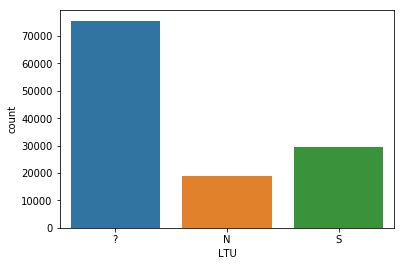

In [14]:
sns.countplot(x='LTU', data=df);

### DiasDesemprego

In [ ]:
# Dataset contendo apenas utentes que se sabe quando acabaram por ficar empregados
df_empregados = df[(df['Empregado']=='S')]

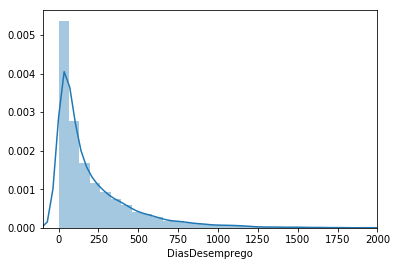

In [16]:
sns.distplot(df_empregados['DiasDesemprego'])
plt.xlim(-100, 2000);

In [18]:
df_empregados['DiasDesemprego'].describe()

count    23215.000000
mean       214.349343
std        262.364293
min          0.000000
25%         41.000000
50%        115.000000
75%        293.000000
max       3273.000000
Name: DiasDesemprego, dtype: float64

In [15]:
#skewness e kurtosis
print("Skewness: %f" % df['DiasDesemprego'].skew())
print("Kurtosis: %f" % df['DiasDesemprego'].kurt())

Skewness: 34.710146
Kurtosis: 5270.179240


### Idade

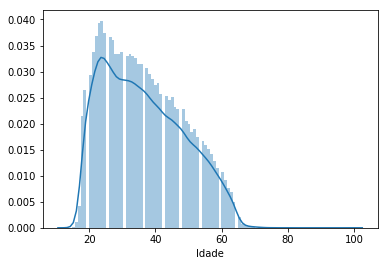

In [20]:
sns.distplot(df['Idade'].dropna(), bins=100);

Estranhamente parece que não existe observações relativas a algumas idades

***

## Análise Exploratória Multivariada

### Distribuição de Idade / LTU

In [49]:
df_LTU = df[df.LTU!='?']
df_LTU.LTU.cat.remove_unused_categories(inplace = True); ## Remove a categoria '?'

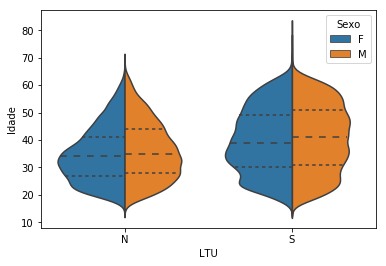

In [50]:
sns.violinplot(x='LTU', y='Idade', hue="Sexo", data=df_LTU, split=True, scale="count", inner="quartile");

A mediana das Idades das populações LTU e N/LTU parece 

### DiasDesemprego-Sexo

Comparação das populações do sexo Masculino e Feminino em relação dos dias de desemprego.<br>
**Nota:** Deve-se filtar apenas as observações que resultaram em emprego pois só nesses casos sabemos ao certo quantos foram os dias que estiveram desempegados

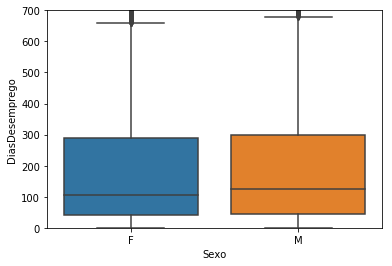

In [17]:
sns.boxplot(x='Sexo', y='DiasDesemprego', data=df_empregados)
plt.ylim(0, 700);

Olhando para a Mediana, aparentemente os utentes do sexo masculino ficam mais tempo desempregados...

In [18]:
print("Mediana 'DiasDesemprego' (Sexo M): {:.0f} dias".format(df_empregados[df.Sexo == 'M']['DiasDesemprego'].median()))
print("Mediana 'DiasDesemprego' (Sexo F): {:.0f} dias".format(df_empregados[df.Sexo == 'F']['DiasDesemprego'].median()))

Mediana 'DiasDesemprego' (Sexo M): 125 dias
Mediana 'DiasDesemprego' (Sexo F): 106 dias


## Funcoes Auxiliares

### Exportar df para MySQL

In [44]:
# Truncar column names a 64 caracteres e substituir caracteres acentuados
import re
import unidecode
oldColNames = [col for col in df]
newColNames = [ re.sub('[^A-Za-z0-9]+', '',unidecode.unidecode((col)))[:64] for col in df ]

df.rename(columns=dict(zip(oldColNames, newColNames)), inplace=True)

In [45]:
# Guarda Dataframe em tabela MySQL
from sqlalchemy import create_engine
PASSWORD_FILENAME = './password.txt'
with open(PASSWORD_FILENAME) as f: mysqlpass = f.read()
engine = create_engine('mysql+pymysql://helio.b.teixeira:{}@vsrv01.inesctec.pt:3306/datasets'.format(mysqlpass.strip()))
df.to_sql('DatasetModelo', engine, if_exists='replace')

<div class="alert alert-block alert-info"> 
- __[Shortcuts](https://www.cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/)__
- __[Markdown](http://datascience.ibm.com/blog/markdown-for-jupyter-notebooks-cheatsheet/)__